In [1]:
import AQiPT_VD as virtual


# Camera

In [2]:
camera_test = virtual.camera(ID=0x7B98A2, power=True,
                                dwellTime=0.01, raisingTime=0.001, exposureTime=1,shutterTime=0.001,
                                imageFormat='.png',width=512,height=512,
                                temperature=18)

In [3]:
camera_test.acquireImage()

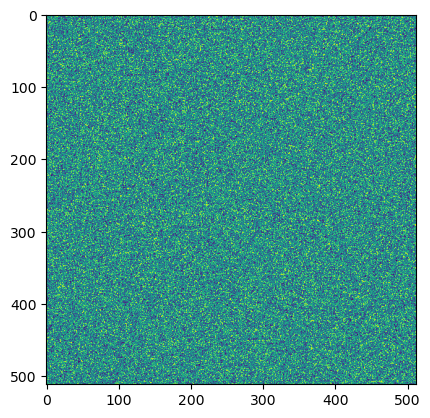

In [4]:
import matplotlib.pyplot as plt

plt.imshow(camera_test.getImage())

In [5]:
camera_test.saveImage()

# Shutters

In [6]:
shutter_test = virtual.shutter(ID=0x7B98A3,
                          dwellTime=0.001, shutterTime=0.001)

shutter_test.open()

# DMD

In [7]:
from PIL import Image
import numpy as np

data = np.array(Image.open('dmd_test.png'))
dmd_test = virtual.DMD(ID=0x7B98A3, image=data)

dmd_test.Start()

dmd_test.SeqAlloc()

dmd_test.SeqPut(data)

dmd_test.Run()
dmd_test.Halt()
dmd_test.Reset()
dmd_test.Stop()

# DDSs

Text(0, 0.5, 'Signal + Clock')

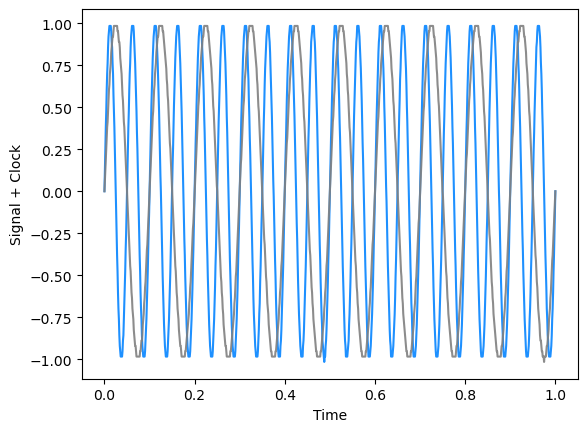

In [8]:
dds_test = virtual.DDS(ID=0x7B98A4, 
                       ttl=None, frequency=20, amplitude=1, phase=0, 
                       sampling=1000, bitdepth=6, 
                       clock=10)

dds_test.ON()
signal, clock, time = dds_test.getSignal(acquisition_time=[0, 1])

plt.plot(time, signal, color='dodgerblue')
plt.plot(time, clock, color='gray', alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Signal + Clock')

# MW sources

Text(0, 0.5, 'Signal + Clock')

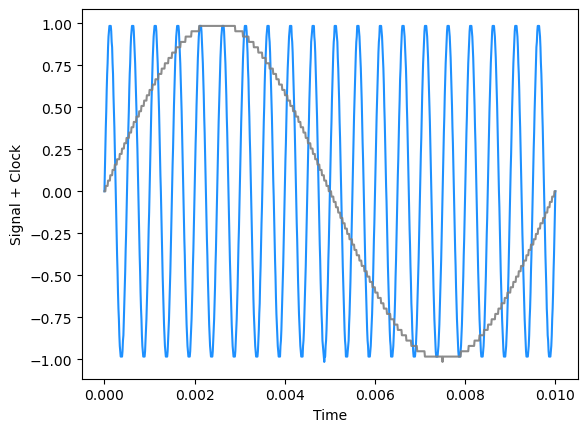

In [9]:
mw_test = virtual.MW_generator(ID=0x7B98A5, 
                      ttl=None, frequency=2000, amplitude=1, phase=0, 
                      sampling=1000, bitdepth=6, 
                      clock=100)  
mw_test.ON()
signal, clock, time = mw_test.getSignal(acquisition_time=[0, 0.01])

plt.plot(time, signal, color='dodgerblue')
plt.plot(time, clock, color='gray', alpha=0.9)
plt.xlabel('Time')
plt.ylabel('Signal + Clock')

# AWGs

Text(0.5, 1.0, 'InterpolatedUnivariateSpline interpolation')

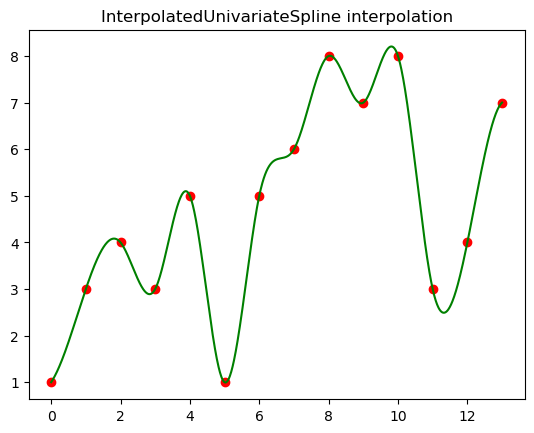

In [47]:
from scipy import interpolate


y = [1,3,4,3,5,1,5,6,8,7,8,3,4,7]
n = len(y)
x = range(0, n)

s = interpolate.InterpolatedUnivariateSpline(x, y)
xfit = np.linspace(0, n-1, 1000)
yfit = s(xfit)

plt.plot(x, y, 'ro')
plt.plot(xfit, yfit,'green')
plt.title("InterpolatedUnivariateSpline interpolation")


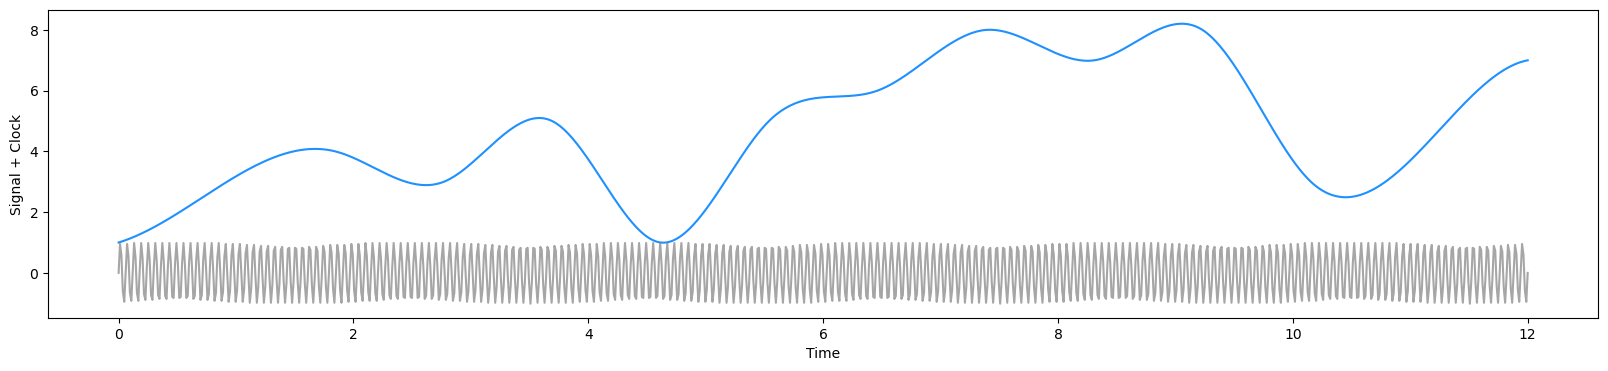

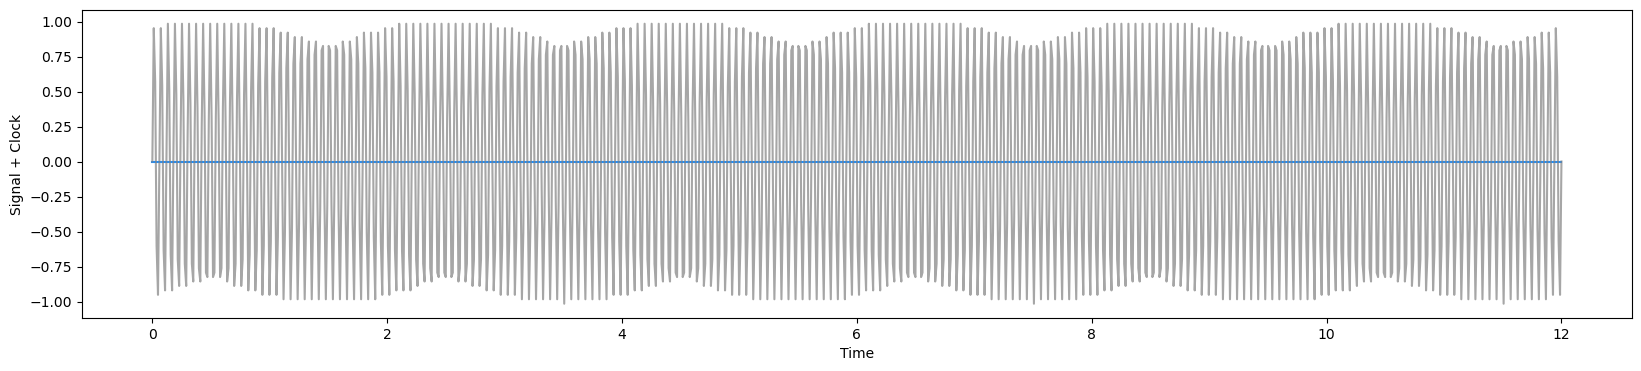

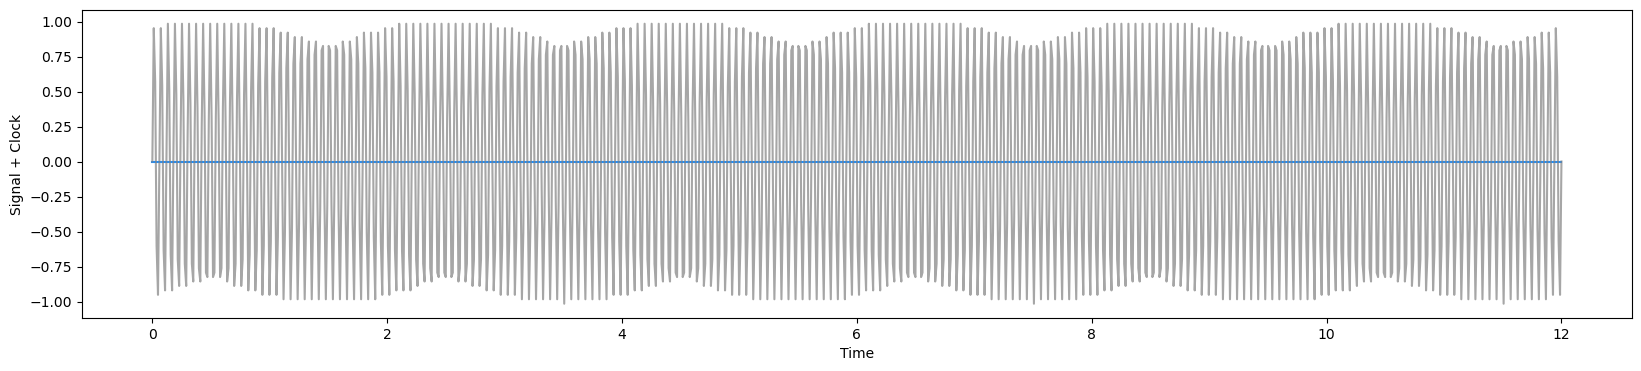

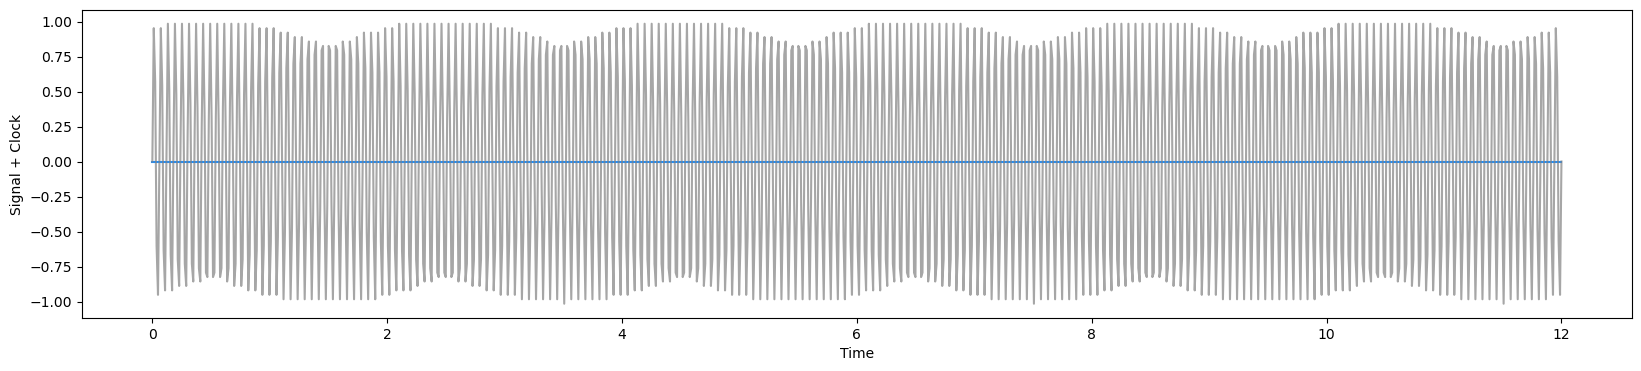

In [51]:
awg_test = virtual.AWG(ID=0x7B98A6, 
                      ttl=None, waveforms=None, 
                      sampling=1000, bitdepth=6, nr_channels=4, 
                      clock=100)  
awg_test.ON()
signal_lst, clock, time = awg_test.getSignal(acquisition_time=[0, 12], ch_lst=[0,1,2,3])

awg_test.setWaveform(waveform=yfit, channel=0)

for signal in signal_lst:
    plt.figure(figsize=(20,4))
    plt.plot(time, signal, color='dodgerblue')
    plt.plot(time, clock, color='gray', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Signal + Clock')

# Lasers

# Oscilloscopes